In [66]:
# Imports - collect all and move here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [395]:
data = pd.read_csv('mbti_1.csv')

In [115]:
pd.set_option('display.max_colwidth', None)
data.head(1)

type  \
0  INFJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [4]:
data.shape

(8675, 2)

<Axes: title={'center': 'Type distribution in data'}, ylabel='type'>

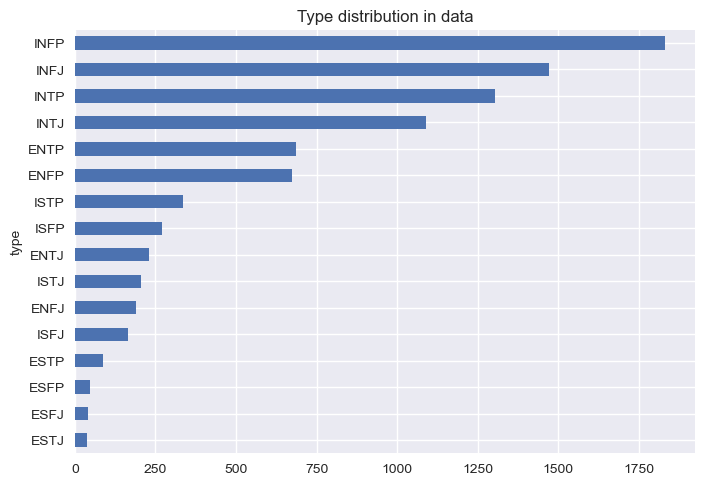

In [360]:
# All 16 types are represented but imbalanced
data['type'].value_counts(ascending = True).plot(kind='barh',
                                                 title = 'Type distribution in data')

In [552]:
data.iloc[3559] # Found later

type           INFP
posts           and
tokenized        []
stems            []
lemmas           []
max_length         
Name: 3559, dtype: object

# Test sample - cleaning + topic modeling

In [ ]:
# Keyword extraction
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Topic modeling - only for EDA and question generation
nltk.download('averaged_perceptron_tagger')

In [ ]:
# NOTE - need to add _ to regex_todrop

In [175]:
import re

# Testing on 1 post
test_post = data.posts[0].lower()

# Def function for removing ||| delimiters
def remove_delimiters(delimiters, s):
    new_s = s
    for i in delimiters:
        new_s = new_s.replace(i, ' ')
    return ' '.join(new_s.split())

test_post = remove_delimiters('|||', test_post)

# Dropping numbers - don't appear to have meaning and might mess up modeling later
test_post = ''.join([i for i in test_post if not i.isdigit()])

# Expressions to drop
regex_todrop = ['[.+]','[(+]','[+)]','[+/+]','[:+:]','[+?]','[+/+]','[+~]','[+,+]',
                "[+'+]",'[+-+]']

# First dropping URLs
text = re.sub(r"\S*https?:\S*", "", test_post) # Dropping URLs

# Drop regex
for r in regex_todrop:
    text = re.sub(r, "", text)

# Quick check on first 800 characters
text[:800]

'  enfp and intj moments  sportscenter not top ten plays  pranks what has been the most life-changing experience in your life   on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace  hello enfj sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as      welcome and stuff  game set match prozac wellbrutin at least thirty minutes of moving your legs and i dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items youve determined that each type or whichever'

In [176]:
# Topic modelling
tokens = nltk.word_tokenize(text)
tkns = [w for w in tokens if len(w) >= 4]

tags = nltk.pos_tag(tkns)
nouns = [word for (word, tag) in tags if tag == 'NN']

tfidf = vectorizer.fit_transform(tkns)

sample1 = sorted(vectorizer.vocabulary_,
                 key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                 reverse = True)
print(sample1[:10])

['enfp', 'intj', 'moments', 'sportscenter', 'plays', 'pranks', 'what', 'been', 'most', 'life']


# Cleaning

In [ ]:
# Joining all text data - this took a long time lol
all_posts = ' '.join(data.posts)

# And dropping URLs
all_posts = re.sub(r"\S*https?:\S*", "", all_posts)

In [ ]:
# Dropping delimiters, numbers
all_cln = remove_delimiters('|||', all_posts)
all_cln = ''.join([i for i in all_cln if not i.isdigit()])

In [183]:
# Dropping regex
clean_text_all = all_cln

for r in regex_todrop:
    clean_text_all = re.sub(r, "", clean_text_all)

# Correcting case
clean_text_all = clean_text_all.lower()

# Quick check
clean_text_all[2000:3000]

'thing about peer pressure banned for a whole host of two baby deer on left and right munching on a beetle in the middle  using their own blood two cavemen diary todays latest happenings on their designated cave diary wall  i see it as a pokemon world an infj society everyone becomes an all artists are artists because they draw its the idea that counts in forming something of your own like a signature welcome to the robot ranks person who downed my self-esteem cuz im not an avid signature artist like herself proud banned for taking all the room under my bed ya gotta learn to share with the for being too much of a thundering grumbling kind of storm yep ahh old high school music i havent heard in ages failed a public speaking class a few years ago and ive sort of learned what i could do better were i to be in that position again a big part of my failure was just overloading myself with too i like this persons mentality hes a confirmed intj by the way to the denver area and start a new li

# EDA

# Topic modeling

In [ ]:
tokens = nltk.word_tokenize(clean_text_all) # full text

# Filtering for nouns
tags = nltk.pos_tag(tokens)
nouns = [word for (word, tag) in tags if tag == 'NN']

# Fit Tfidf to nouns only for topic modeling
tfidf = vectorizer.fit_transform(nouns)

all_nouns = sorted(vectorizer.vocabulary_,
                   key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                   reverse = True)

In [184]:
from collections import Counter
uniq_nouns = Counter(all_nouns_filt).keys() # dict_keys

print(len(all_nouns), len(uniq_nouns))

66963 63167


In [ ]:
# For removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [194]:
top_100 = [n for n in all_nouns if len(n) >= 4][:200]
top_100 = [w for w in top_100 if w.lower() not in stop_words]
print(top_100)

['experience', 'repeat', 'today', 'perc', 'immerse', 'thing', 'infj', 'friend', 'facebook', 'peace', 'enfj', 'sorry', 'distress', 'relationship', 'perfection', 'time', 'moment', 'existence', 'growth', 'welcome', 'game', 'match', 'prozac', 'wellbrutin', 'dont', 'mean', 'desk', 'chair', 'weed', 'moderation', 'healthier', 'type', 'whatnot', 'video', 'note', 'death', 'someone', 'everyone', 'wait', 'confidence', 'world', 'youre', 'personalitywell', 'outlet', 'part', 'thread', 'backyard', 'roast', 'something', 'sentence', 'corner', 'health', 'class', 'nothing', 'peer', 'pressure', 'host', 'left', 'munching', 'beetle', 'middle', 'blood', 'wall', 'pokemon', 'society', 'idea', 'signature', 'robot', 'person', 'artist', 'room', 'share', 'kind', 'storm', 'school', 'music', 'speaking', 'sort', 'position', 'failure', 'mentality', 'intj', 'area', 'life', 'lack', 'example', 'girlfriend', 'environment', 'cowgirl', 'meaning', 'theory', 'hello', 'presence', 'wordplay', 'cheeky', 'balance', 'hand', 'coord

In [ ]:
from functools import reduce
posts_100 = list(data.posts[:1100])

In [245]:
topic_freq = {}

for topic in top_100[:20]:
    topic_freq.setdefault(topic, 0)

In [246]:
for post in posts_100:
    for topic in topic_freq.keys():
        if topic in post:
            topic_freq[topic] += 1
        else: pass

In [235]:
topic_freq

{'experience': 526,
 'repeat': 106,
 'today': 304,
 'perc': 262,
 'immerse': 10,
 'thing': 1084,
 'infj': 61,
 'friend': 897,
 'facebook': 55,
 'peace': 98}

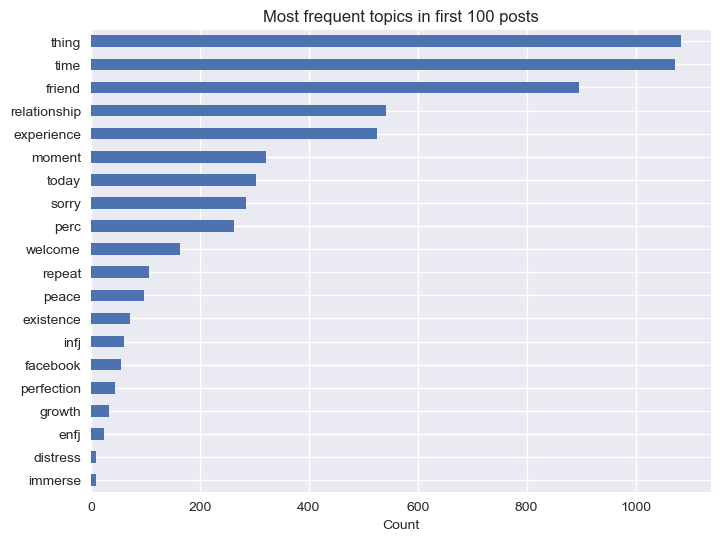

In [277]:
plt.style.use('seaborn-v0_8')

topics_df = pd.Series(topic_freq).to_frame()
topics_df.columns = ['count']
topics_df = topics_df.sort_values(by = 'count', ascending = True)

topics_df.plot.barh(figsize = (8,6), title = 'Most frequent topics in first 100 posts',
                    xlabel = 'Count', fontsize = 10, legend = False);

In [292]:
# Drop MBTI keywords
mbtis = ['intp','istp','entp','enfp','isfp','infp','intj','infj',
           'estj','entj','esfj','enfj','istj','isfj','estp','esfp',
           'infjs','intps','extj']
top_100_nombti = top_100

for t in mbtis:
    try:
        top_100_nombti.remove(t)
    except: pass
    
print(top_100_nombti)

['experience', 'repeat', 'today', 'perc', 'immerse', 'thing', 'friend', 'facebook', 'peace', 'sorry', 'distress', 'relationship', 'perfection', 'time', 'moment', 'existence', 'growth', 'welcome', 'game', 'match', 'prozac', 'wellbrutin', 'dont', 'mean', 'desk', 'chair', 'weed', 'moderation', 'healthier', 'type', 'whatnot', 'video', 'note', 'death', 'someone', 'everyone', 'wait', 'confidence', 'world', 'youre', 'personalitywell', 'outlet', 'part', 'thread', 'backyard', 'roast', 'something', 'sentence', 'corner', 'health', 'class', 'nothing', 'peer', 'pressure', 'host', 'left', 'munching', 'beetle', 'middle', 'blood', 'wall', 'pokemon', 'society', 'idea', 'signature', 'robot', 'person', 'artist', 'room', 'share', 'kind', 'storm', 'school', 'music', 'speaking', 'sort', 'position', 'failure', 'mentality', 'area', 'life', 'lack', 'example', 'girlfriend', 'environment', 'cowgirl', 'meaning', 'theory', 'hello', 'presence', 'wordplay', 'cheeky', 'balance', 'hand', 'coordination', 'test', 'site'

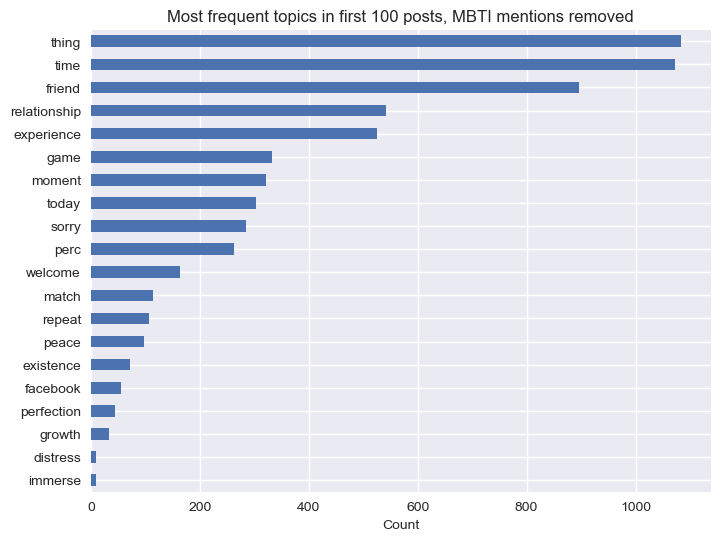

In [294]:
topic_freq_2 = {}

for topic in top_100_nombti[:20]:
    topic_freq_2.setdefault(topic, 0)
    
for post in posts_100:
    for topic in topic_freq_2.keys():
        if topic in post:
            topic_freq_2[topic] += 1
        else: pass

topics_df = pd.Series(topic_freq_2).to_frame()
topics_df.columns = ['count']
topics_df = topics_df.sort_values(by = 'count', ascending = True)

topics_df.plot.barh(figsize = (8,6), title = 'Most frequent topics in first 100 posts, MBTI mentions removed',
                    xlabel = 'Count', fontsize = 10, legend = False);

# Wordcloud

# Topics by type

In [312]:
intp = data[data['type'] == 'INTP']
istp = data[data['type'] == 'ISTP']
entp = data[data['type'] == 'ENTP']
enfp = data[data['type'] == 'ENFP']
isfp = data[data['type'] == 'ISFP']
infp = data[data['type'] == 'INFP']
intj = data[data['type'] == 'INTJ']
infj = data[data['type'] == 'INFJ']
estj = data[data['type'] == 'ESTJ']
entj = data[data['type'] == 'ENTJ']
esfj = data[data['type'] == 'ESFJ']
enfj = data[data['type'] == 'ENFJ']
istj = data[data['type'] == 'ISTJ']
isfj = data[data['type'] == 'ISFJ']
estp = data[data['type'] == 'ESTP']
esfp = data[data['type'] == 'ESFP']

posts_bytype = [intp, istp, entp, enfp, isfp, infp, intj, infj,
                estj, entj, esfj, enfj, istj, isfj, estp, esfp]
lengths = []

for t in posts_bytype:
    lengths.append(len(t))
    
post_counts_bytype = {to_drop[i]: lengths[i] for i in range(len(lengths))}
post_counts_bytype

{'intp': 1304,
 'istp': 337,
 'entp': 685,
 'enfp': 675,
 'isfp': 271,
 'infp': 1832,
 'intj': 1091,
 'infj': 1470,
 'estj': 39,
 'entj': 231,
 'esfj': 42,
 'enfj': 190,
 'istj': 205,
 'isfj': 166,
 'estp': 89,
 'esfp': 48}

In [366]:
nltk.download('words')
words = set(nltk.corpus.words.words())

def clean_txt(posts):
    txt = ' '.join(posts)
    txt = re.sub(r"\S*https:\S*", "", txt)
    txt = re.sub(r"\S*http:\S*", "", txt) # Fixed, not run
    txt = remove_delimiters('|||', txt)
    txt = ''.join([i for i in txt if not i.isdigit()])
    for r in regex_todrop:
        txt = re.sub(r, "", txt)
    return txt

def get_topics(txt):
    tokens = nltk.word_tokenize(txt)
    tags = nltk.pos_tag(tokens)
    nouns = [word for (word, tag) in tags if tag == 'NN']
    tfidf = vectorizer.fit_transform(nouns)
    all_nouns = sorted(vectorizer.vocabulary_,
                       key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                       reverse = True)
    # uniq_nouns = Counter(all_nouns.keys())
    topics = [n for n in all_nouns if len(n) >= 4][:200]
    topics = [w for w in topics if w.lower() not in stop_words] 
    topics = [w for w in topics if w in words]
    return topics

def plot_topics(topics_list, posts_list, title):
    topic_freq = {}
    for topic in topics_list[:15]:
        topic_freq.setdefault(topic, 0)
    for post in posts_list:
        for topic in topic_freq.keys():
            if topic in post:
                topic_freq[topic] += 1
            else: pass
    topics_df = pd.Series(topic_freq).to_frame()
    topics_df.columns = ['count']
    topics_df = topics_df.sort_values(by = 'count', ascending = True)
    topics_df.plot.barh(figsize = (8,5), title = title,
                        xlabel = 'Count', fontsize = 10, legend = False);

[nltk_data] Downloading package words to /Users/ali/nltk_data...
[nltk_data]   Package words is already up-to-date!


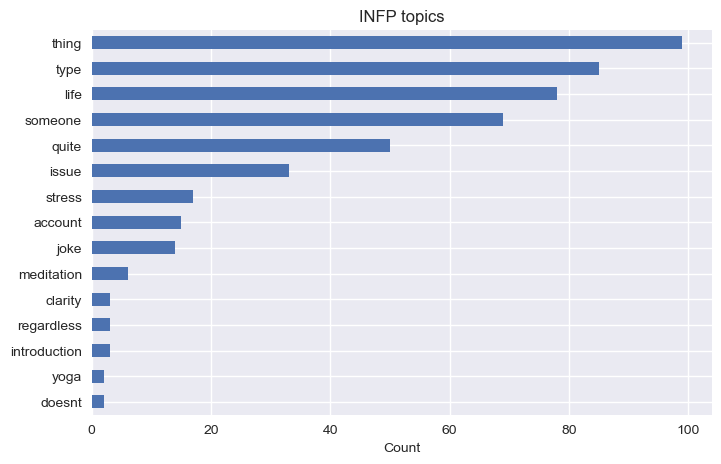

In [367]:
def clean_get_plot_topics(posts, title):
    txt = clean_txt(posts)
    topics = get_topics(txt)
    plot_topics(topics, posts, title)
    
clean_get_plot_topics(infp.posts[:100], 'INFP topics')

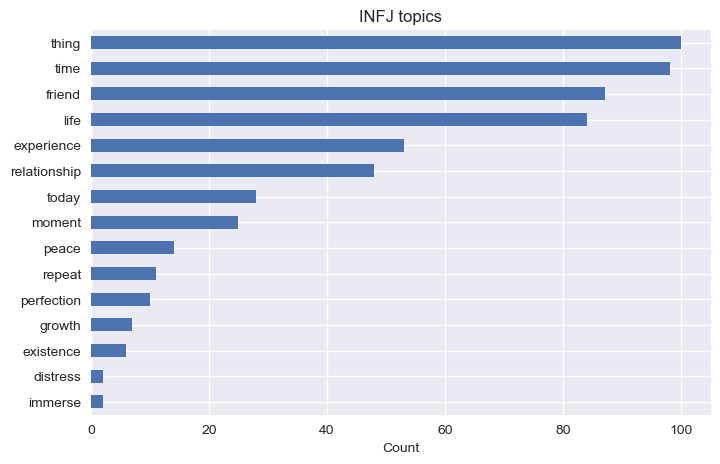

In [368]:
clean_get_plot_topics(infj.posts[:100], 'INFJ topics')

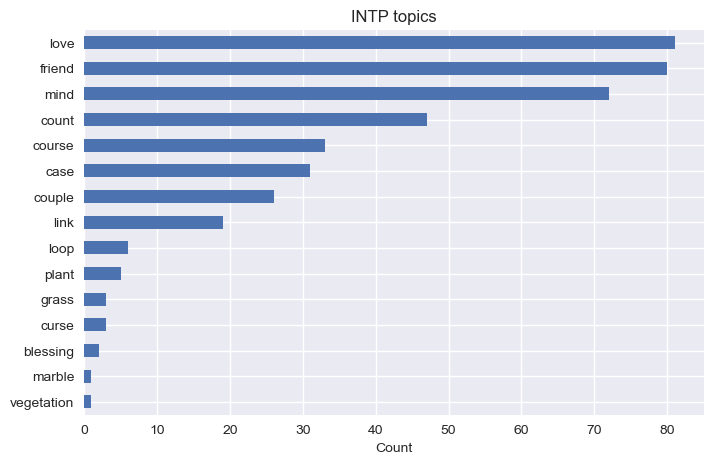

In [376]:
clean_get_plot_topics(intp.posts[:100], 'INTP topics')

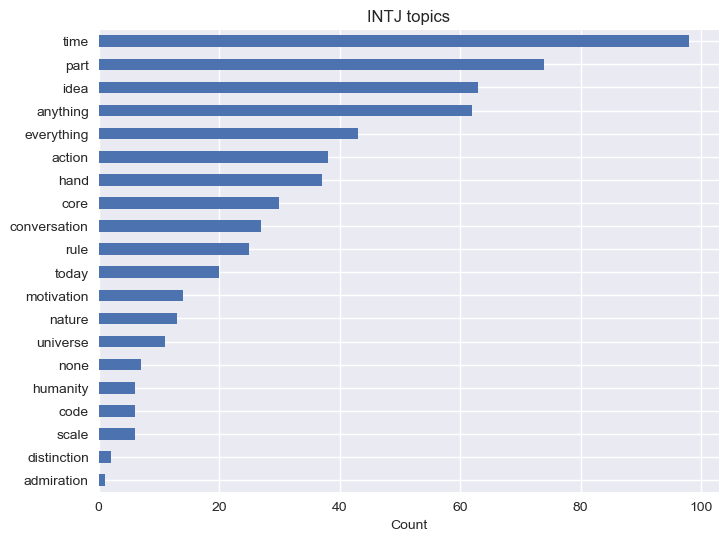

In [358]:
clean_get_plot_topics(intj.posts, 'INTJ topics')

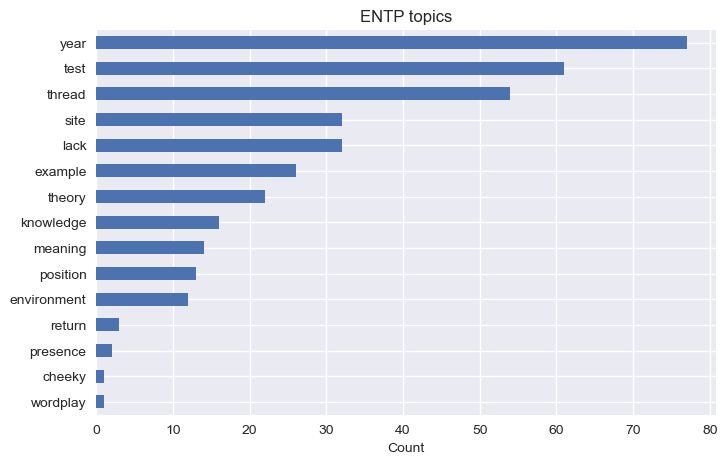

In [375]:
clean_get_plot_topics(entp.posts[:100], 'ENTP topics')

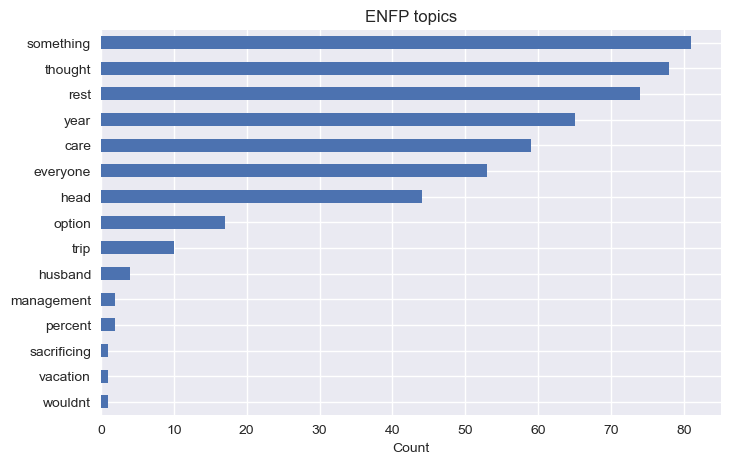

In [374]:
clean_get_plot_topics(enfp.posts[:100], 'ENFP topics')

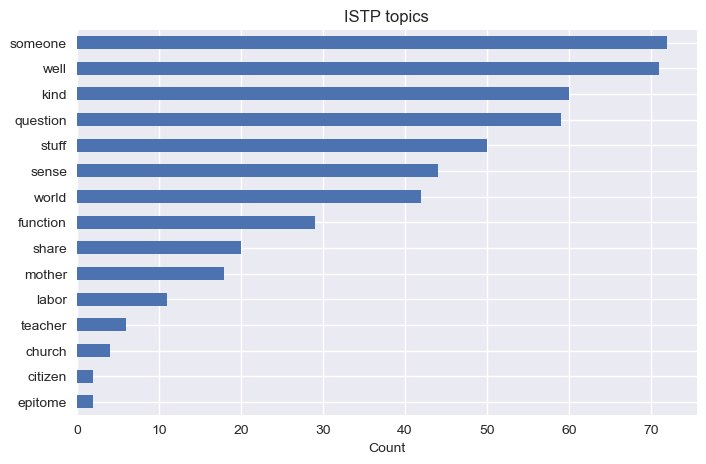

In [373]:
clean_get_plot_topics(istp.posts[:100], 'ISTP topics')

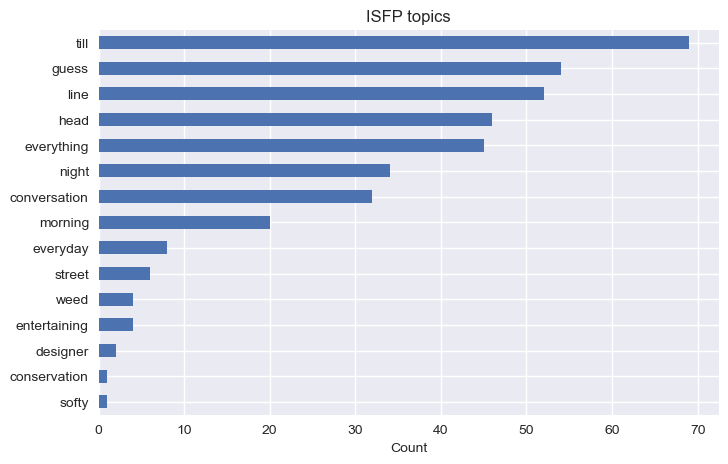

In [372]:
clean_get_plot_topics(isfp.posts[:100], 'ISFP topics')

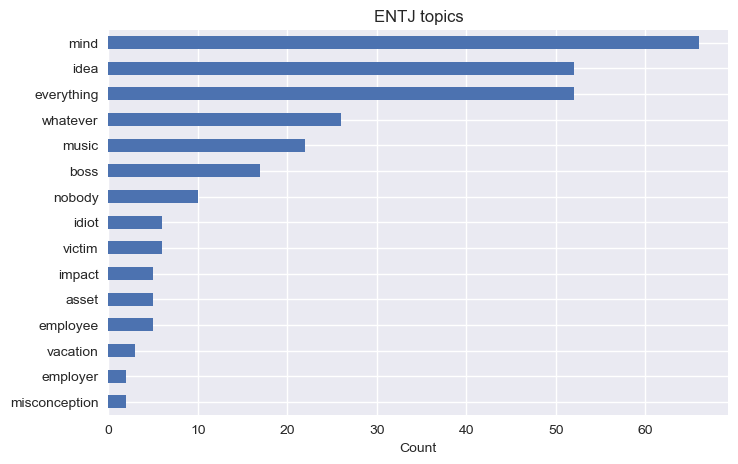

In [371]:
clean_get_plot_topics(entj.posts[:100], 'ENTJ topics')

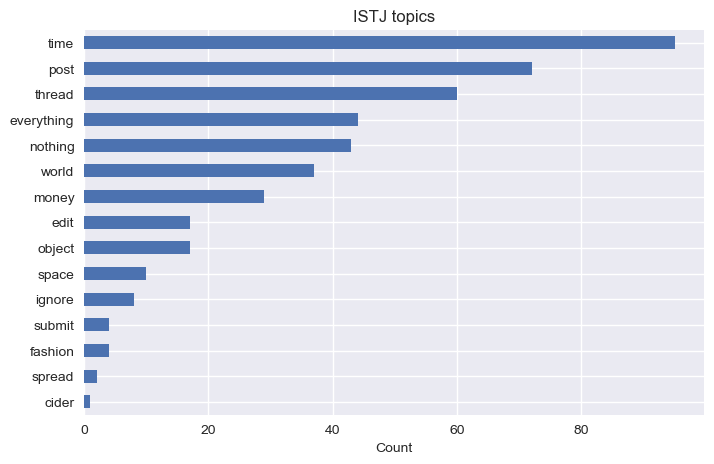

In [370]:
clean_get_plot_topics(istj.posts[:100], 'ISTJ topics')

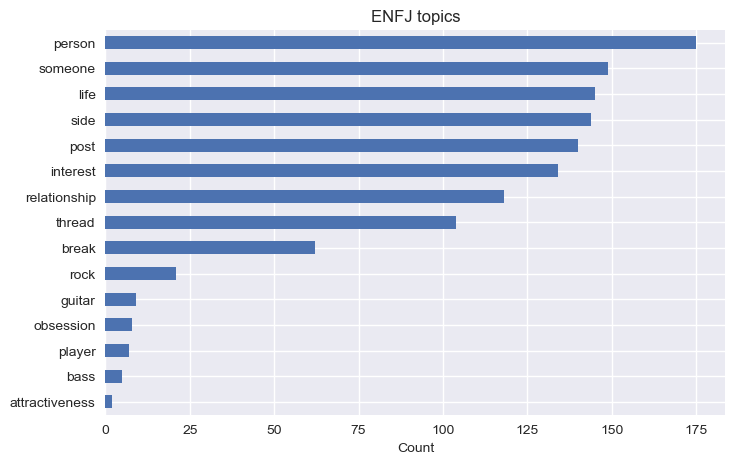

In [369]:
clean_get_plot_topics(enfj.posts, 'ENFJ topics')

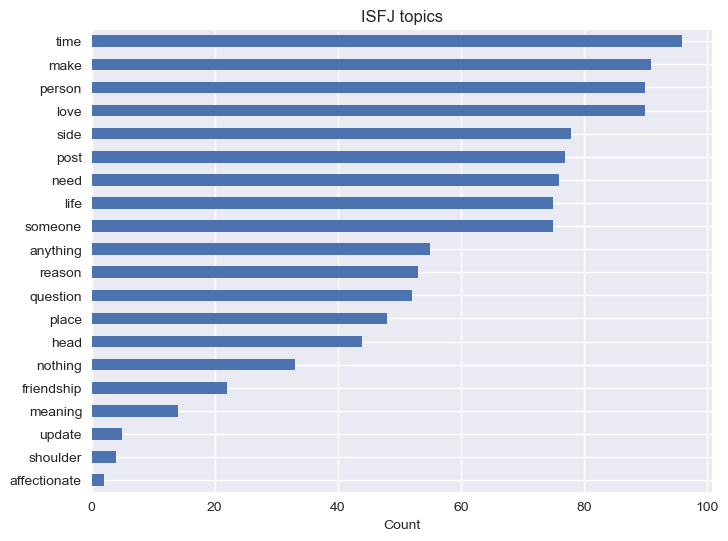

In [363]:
clean_get_plot_topics(isfj.posts, 'ISFJ topics')

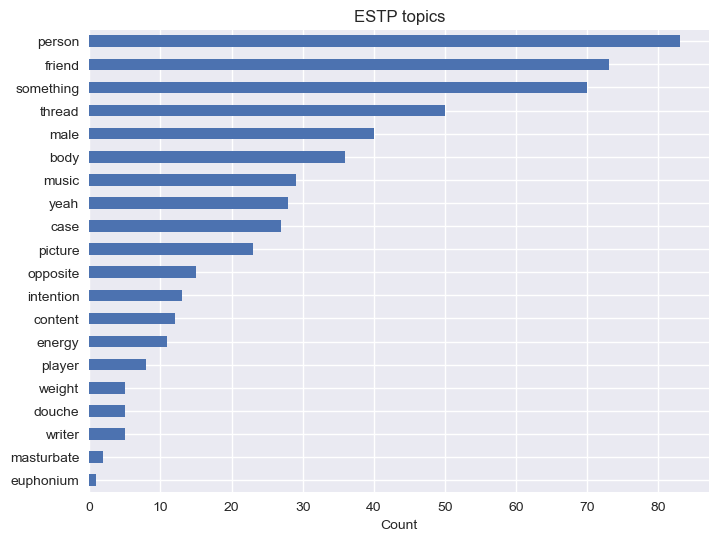

In [362]:
clean_get_plot_topics(estp.posts, 'ESTP topics')

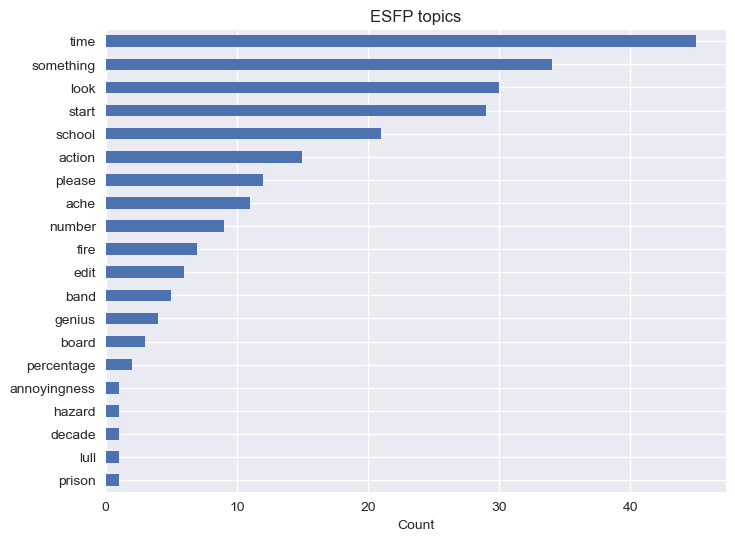

In [361]:
clean_get_plot_topics(esfp.posts, 'ESFP topics')

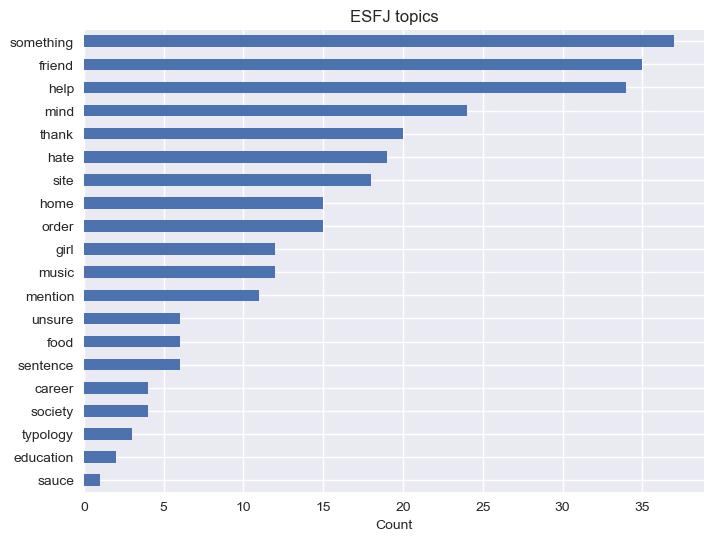

In [357]:
clean_get_plot_topics(esfj.posts, 'ESFJ topics')

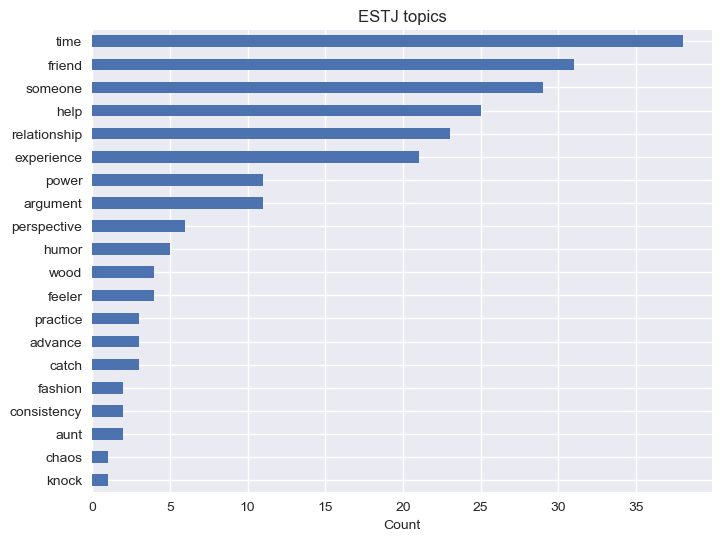

In [356]:
clean_get_plot_topics(estj.posts, 'ESTJ topics')

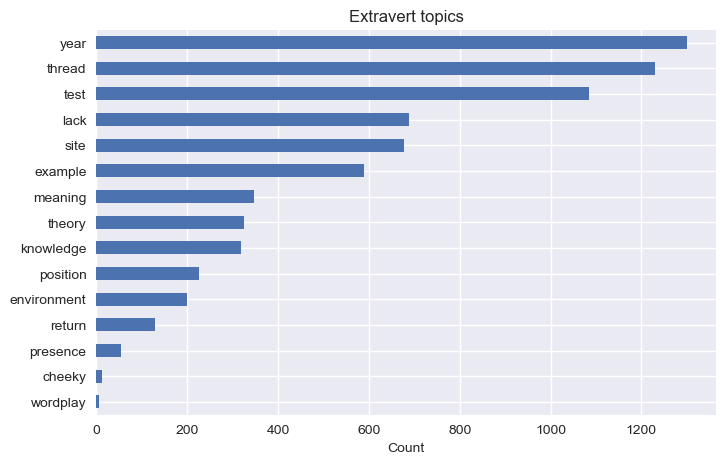

In [382]:
# Compare extraverts and introverts
e_posts = data[data['type'].isin(['ENTP','ENFP','ENTJ','ENFJ','ESTP','ESFP','ESFJ','ESTJ'])]
i_posts = data[data['type'].isin(['INFP','INFJ','INTP','INTJ','ISTP','ISFP','ISTJ','ISFJ'])]

clean_get_plot_topics(e_posts.posts, 'Extravert topics')

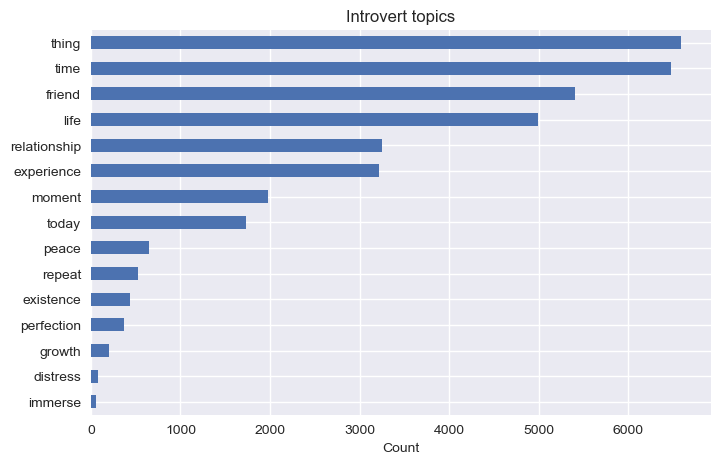

In [383]:
clean_get_plot_topics(i_posts.posts, 'Introvert topics')

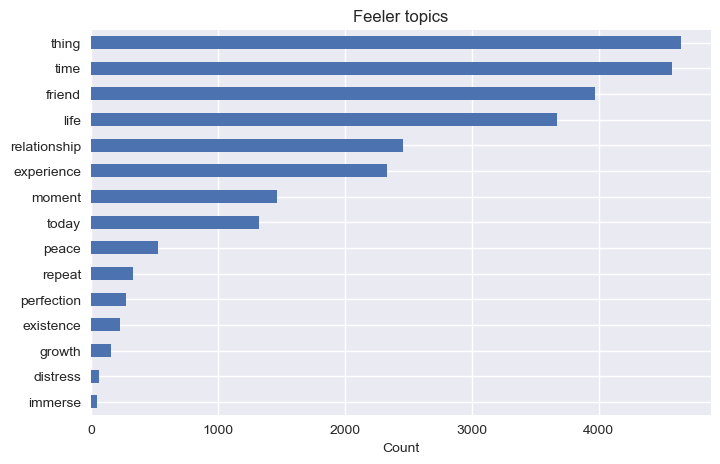

In [384]:
# Compare 'feelers' and 'thinkers'
f_posts = data[data['type'].isin(['INFP','INFJ','ENFP','ISFP','ENFJ','ISFJ','ESFP','ESFJ'])]
t_posts = data[data['type'].isin(['INTP','INTJ','ENTP','ISTP','ENTJ','ISTJ','ESTP','ESTJ'])]
               
clean_get_plot_topics(f_posts.posts, 'Feeler topics')

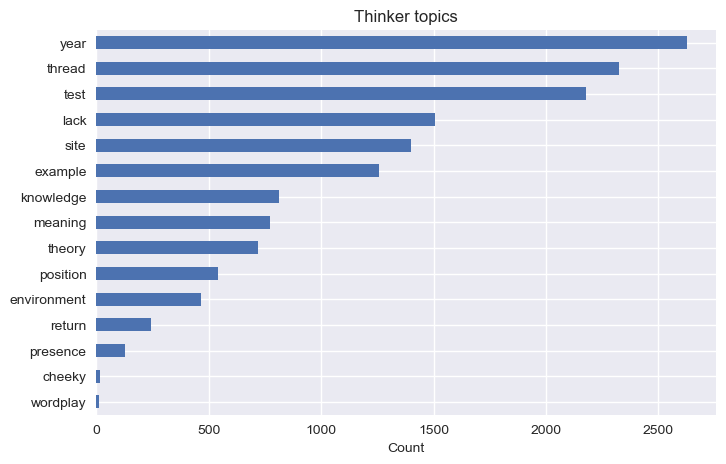

In [385]:
clean_get_plot_topics(t_posts.posts, 'Thinker topics')

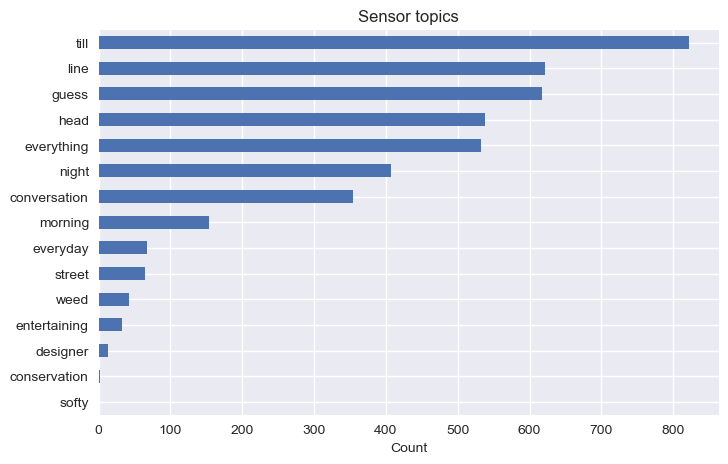

In [386]:
# Compare 'sensors' and 'intuitives'
s_posts = data[data['type'].isin(['ISTP','ISFP','ISTJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ'])]
n_posts = data[data['type'].isin(['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ENTJ','ENFJ'])]

clean_get_plot_topics(s_posts.posts, 'Sensor topics')

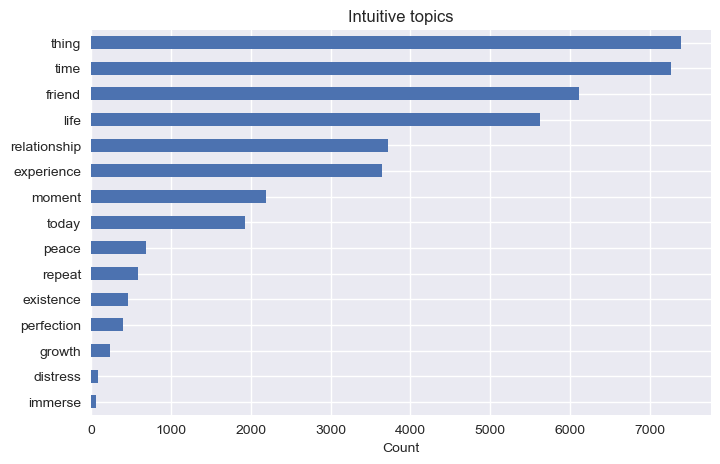

In [387]:
clean_get_plot_topics(n_posts.posts, 'Intuitive topics')

# Sentiment analysis

In [577]:
emo = pd.DataFrame(pd.read_csv('emotions.csv'))#.set_index('word', drop = True)
#emo.index = emo.index.str.replace(' ','')
emo.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,2
4,i am feeling grouchy,3


In [578]:
emo_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear'}
emo['emotion'] = emo['label'].map(emo_map)
emo.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,2,love
4,i am feeling grouchy,3,anger


In [596]:
from textblob import TextBlob
TextBlob(data.posts[0]).sentiment

Sentiment(polarity=0.168185284767316, subjectivity=0.4997306209415583)

# Preprocessing

In [419]:
def clean_post(post):
    txt = post.lower()
    txt = re.sub(r"\S*https:\S*", "", txt)
    txt = re.sub(r"\S*http:\S*", "", txt)
    txt = remove_delimiters('|||', txt)
    txt = ''.join([i for i in txt if not i.isdigit()])
    for r in regex_todrop:
        txt = re.sub(r, "", txt)
    return txt

# data_pretest = data
# data_pretest.posts[0].lower()

for i in range(len(data.index)):
    post = data.posts[i]
    clean = clean_post(post)
    data.posts[i] = clean

In [ ]:
data['tokenized'] = ''

for i in range(len(data_pretest.index)):
    post = data.posts[i]
    tokens = nltk.word_tokenize(post)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [w for w in tokens if w in words]
    data['tokenized'][i] = tokens

In [428]:
for i in range(len(data.index)):
    sample = data.tokenized[i]
    clean = [w for w in sample if len(w) >= 3]
    data['tokenized'][i] = clean
    
print(data.tokenized[22])

['interested', 'lazy', 'research', 'welcome', 'club', 'mate', 'profile', 'picture', 'welcome', 'welcome', 'back', 'communist', 'party', 'sorry', 'ask', 'welcome', 'thats', 'interesting', 'nickname', 'youve', 'got', 'female', 'name', 'clearly', 'something', 'mind', 'mean', 'drink', 'red', 'wine', 'taste', 'thats', 'sure', 'thread', 'former', 'drug', 'much', 'difference', 'difference', 'talking', 'serious', 'person', 'perception', 'somewhat', 'like', 'apart', 'gossip', 'thing', 'interesting', 'part', 'love', 'gossip', 'lot', 'wasnt', 'say', 'premature', 'always', 'got', 'away', 'making', 'smelly', 'smoke', 'high', 'school', 'political', 'like', 'ironically', 'monument', 'back', 'country', 'wont', 'really', 'annoying', 'free', 'play', 'tongue', 'see', 'machi', 'days', 'life', 'pretty', 'boring', 'trying', 'video', 'moment', 'dont', 'really', 'help', 'know', 'well', 'enough', 'write', 'even', 'tried', 'got', 'carried', 'away', 'obvious', 'everyday', 'quite', 'interesting', 'especially', 't

In [ ]:
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
data['stems'] = ''

for i in range(len(data.index)):
    sample = data.tokenized[i]
    data['stems'][i] = [stemmer.stem(w) for w in sample]

In [563]:
print(data.stems[22])

['interest', 'lazi', 'research', 'welcom', 'club', 'mate', 'profil', 'pictur', 'welcom', 'welcom', 'back', 'communist', 'parti', 'sorri', 'ask', 'welcom', 'that', 'interest', 'nicknam', 'youv', 'got', 'femal', 'name', 'clear', 'someth', 'mind', 'mean', 'drink', 'red', 'wine', 'tast', 'that', 'sure', 'thread', 'former', 'drug', 'much', 'differ', 'differ', 'talk', 'serious', 'person', 'percept', 'somewhat', 'like', 'apart', 'gossip', 'thing', 'interest', 'part', 'love', 'gossip', 'lot', 'wasnt', 'say', 'prematur', 'alway', 'got', 'away', 'make', 'smelli', 'smoke', 'high', 'school', 'polit', 'like', 'iron', 'monument', 'back', 'countri', 'wont', 'realli', 'annoy', 'free', 'play', 'tongu', 'see', 'machi', 'day', 'life', 'pretti', 'bore', 'tri', 'video', 'moment', 'dont', 'realli', 'help', 'know', 'well', 'enough', 'write', 'even', 'tri', 'got', 'carri', 'away', 'obvious', 'everyday', 'quit', 'interest', 'especi', 'tri', 'unturn', 'pretti', 'cool', 'surviv', 'game', 'made', 'guy', 'alway', 

In [433]:
nltk.download('wordnet')
nltk.download('omw-1.4')
wn_lem = nltk.WordNetLemmatizer()

data['lemmas'] = ''

for i in range(len(data.index)):
    sample = data.tokenized[i]
    data['lemmas'][i] = [wn_lem.lemmatize(w) for w in sample]
    
print(data.lemmas[22])

[nltk_data] Downloading package wordnet to /Users/ali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ali/nltk_data...


['interested', 'lazy', 'research', 'welcome', 'club', 'mate', 'profile', 'picture', 'welcome', 'welcome', 'back', 'communist', 'party', 'sorry', 'ask', 'welcome', 'thats', 'interesting', 'nickname', 'youve', 'got', 'female', 'name', 'clearly', 'something', 'mind', 'mean', 'drink', 'red', 'wine', 'taste', 'thats', 'sure', 'thread', 'former', 'drug', 'much', 'difference', 'difference', 'talking', 'serious', 'person', 'perception', 'somewhat', 'like', 'apart', 'gossip', 'thing', 'interesting', 'part', 'love', 'gossip', 'lot', 'wasnt', 'say', 'premature', 'always', 'got', 'away', 'making', 'smelly', 'smoke', 'high', 'school', 'political', 'like', 'ironically', 'monument', 'back', 'country', 'wont', 'really', 'annoying', 'free', 'play', 'tongue', 'see', 'machi', 'day', 'life', 'pretty', 'boring', 'trying', 'video', 'moment', 'dont', 'really', 'help', 'know', 'well', 'enough', 'write', 'even', 'tried', 'got', 'carried', 'away', 'obvious', 'everyday', 'quite', 'interesting', 'especially', 'tr

# Vectorizing

In [570]:
data['lemmatized'] = ''

for i in range(len(data.index)):
    data['lemmatized'][i] = ' '.join(data.lemmas[i])

In [572]:
from sklearn.model_selection import train_test_split

# Define target
X = data.lemmatized
y = data.type

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 17)

In [594]:
class lemmatizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, data):
        return [self.wnl.lemmatize(word) for word in nltk.word_tokenize(data)]

vectorizer = CountVectorizer(max_features = 100, max_df = .9, min_df = .1, ngram_range = (1,2),
                             tokenizer = lemmatizer(), lowercase = True, stop_words = 'english',
                             token_pattern = r'w+')
vectorizer.fit(data.posts)
count_vector = vectorizer.transform(data.posts)

bow = count_vector.toarray()
bow = pd.DataFrame(bow, columns = vectorizer.get_feature_names_out())
bow.head()

,!,! !,*,-,;,actually,agree,bad,believe,best,...,use,usually,want,way,work,world,yeah,year,yes,youre
0,2,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,2,0,1,0,1
1,0,0,4,0,8,0,0,1,1,1,...,5,0,4,3,3,0,0,1,0,4
2,4,0,0,8,5,2,0,1,0,2,...,1,0,1,1,2,1,0,4,2,3
3,3,0,0,2,0,2,1,0,2,1,...,0,0,1,2,1,0,1,0,0,6
4,1,0,0,0,2,1,0,2,0,2,...,1,0,4,1,1,0,0,1,1,1


# Feature engineering

In [641]:
data['polarity'] = ''
data['subjectivity'] = ''

for i in range(len(data.index)):
    sentiment = TextBlob(data.posts[i]).sentiment
    polarity = sentiment[0]
    data['polarity'][i] = polarity
    subjectivity = sentiment[1]
    data['subjectivity'][i] = subjectivity

In [642]:
intp = data[data['type'] == 'INTP']
istp = data[data['type'] == 'ISTP']
entp = data[data['type'] == 'ENTP']
enfp = data[data['type'] == 'ENFP']
isfp = data[data['type'] == 'ISFP']
infp = data[data['type'] == 'INFP']
intj = data[data['type'] == 'INTJ']
infj = data[data['type'] == 'INFJ']
estj = data[data['type'] == 'ESTJ']
entj = data[data['type'] == 'ENTJ']
esfj = data[data['type'] == 'ESFJ']
enfj = data[data['type'] == 'ENFJ']
istj = data[data['type'] == 'ISTJ']
isfj = data[data['type'] == 'ISFJ']
estp = data[data['type'] == 'ESTP']
esfp = data[data['type'] == 'ESFP']

In [ ]:
type_dfs_ls = [intp, istp, entp, enfp, isfp, infp, intj, infj,
               estj, entj, esfj, enfj, istj, isfj, estp, esfp]

In [660]:
data.head(3)

,index,type,posts,tokenized,stems,lemmas,top_words,lemmatized,polarity,subjectivity
0,0,INFJ,and intj moments sportscenter not top ten plays pranks what has been the most life-changing experience in your on repeat for most of today may the...,"[top, ten, experience, repeat, today, may, experience, immerse, last, thing, friend, posted, suicide, next, day, rest, peace, sorry, hear, distres...","[top, ten, experi, repeat, today, may, experi, immers, last, thing, friend, post, suicid, next, day, rest, peac, sorri, hear, distress, natur, rel...","[top, ten, experience, repeat, today, may, experience, immerse, last, thing, friend, posted, suicide, next, day, rest, peace, sorry, hear, distres...","[experience, repeat, today, immerse, thing, friend, peace, sorry, distress, relationship]",top ten experience repeat today may experience immerse last thing friend posted suicide next day rest peace sorry hear distress natural relationsh...,0.168185,0.499731
1,1,ENTP,im finding the lack of me in these posts very alarming sex can be boring if its in the same position often for example me and my girlfriend are cu...,"[finding, lack, alarming, sex, boring, position, often, example, currently, environment, creatively, use, missionary, enough, giving, new, meaning...","[find, lack, alarm, sex, bore, posit, often, exampl, current, environ, creativ, use, missionari, enough, give, new, mean, game, theori, hello, gri...","[finding, lack, alarming, sex, boring, position, often, example, currently, environment, creatively, use, missionary, enough, giving, new, meaning...","[lack, position, example, environment, meaning, game, theory, hello, presence, wordplay]",finding lack alarming sex boring position often example currently environment creatively use missionary enough giving new meaning game theory hell...,0.082649,0.497033
2,2,INTP,good one _____ course to which i say i know; thats my blessing and my curse does being absolutely positive that you and your best friend could be ...,"[good, one, course, say, know, thats, blessing, curse, absolutely, positive, best, friend, could, amazing, couple, count, yes, could, madly, love,...","[good, one, cours, say, know, that, bless, curs, absolut, posit, best, friend, could, amaz, coupl, count, yes, could, mad, love, case, didnt, than...","[good, one, course, say, know, thats, blessing, curse, absolutely, positive, best, friend, could, amazing, couple, count, yes, could, madly, love,...","[course, blessing, curse, friend, couple, count, love, case, didnt, link]",good one course say know thats blessing curse absolutely positive best friend could amazing couple count yes could madly love case didnt thank lin...,0.142715,0.584298


In [675]:
mean_pol_by_type = data.groupby(by = 'type')['polarity'].agg('mean')
mean_sentiment_by_type = pd.DataFrame(mean_pol_by_type)
mean_sub_by_type = data.groupby(by = 'type')['subjectivity'].agg('mean')
mean_sentiment_by_type['subjectivity'] = mean_sub_by_type
mean_sentiment_by_type

,polarity,subjectivity
type,,
ENFJ,0.153297,0.54288
ENFP,0.140303,0.542803
ENTJ,0.120929,0.530432
ENTP,0.116467,0.534792
ESFJ,0.145052,0.537938
ESFP,0.117759,0.540207
ESTJ,0.115782,0.528174
ESTP,0.119807,0.532443
INFJ,0.127495,0.533574


<Axes: title={'center': 'Polarity by type'}, ylabel='type'>

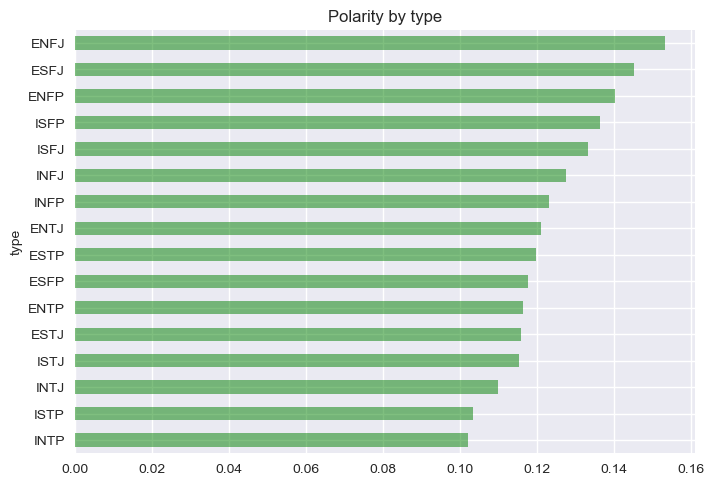

In [696]:
mean_sentiment_by_type.sort_values(by = 'polarity', ascending = True, inplace = True)
mean_sentiment_by_type['polarity'].plot(kind = 'barh', alpha = .5, color = 'green',
                                        title = 'Polarity by type')

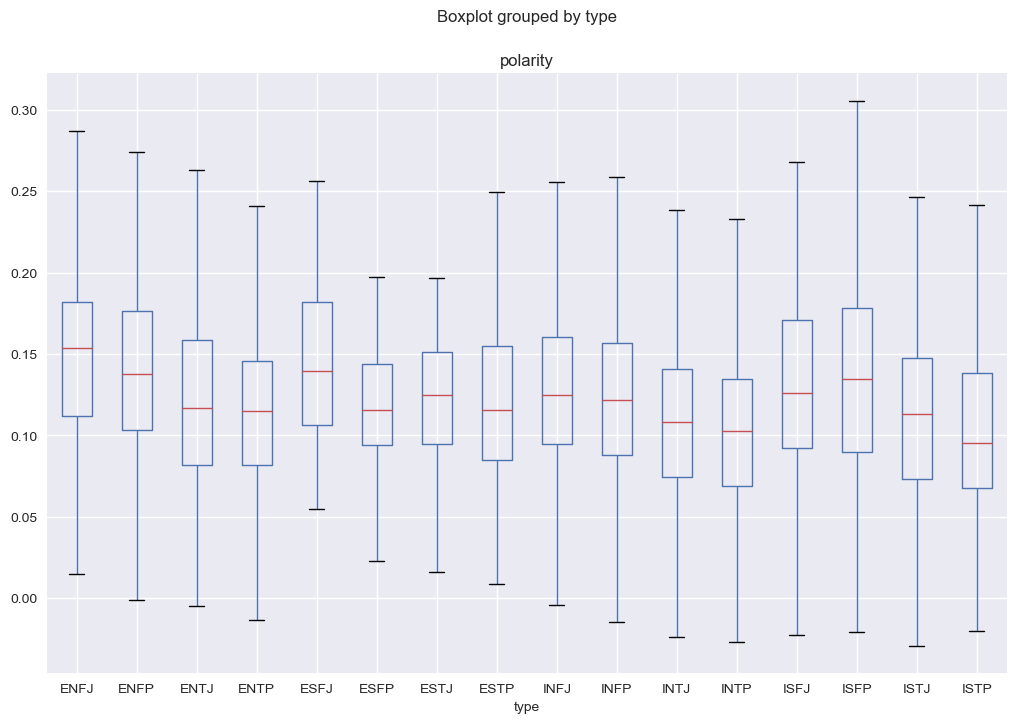

In [702]:
data.boxplot(column = 'polarity', by = 'type', showfliers = False, figsize = (12,8));

In [567]:
# Top words for each sample
data.reset_index(inplace = True)
data['top_words'] = ''

for i in range(len(data.index)):
    sample = data.posts[i]
    topics = get_topics(sample)
    data['top_words'][i] = topics[:10]
    
data.head()

index  type  \
0      0  INFJ   
1      1  ENTP   
2      2  INTP   
3      3  INTJ   
4      4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

- look up AllenNLP
- try SpaCy or Polyglot pos tagging vs. nltk
- look up sentence segmentation
- look up Gensim for semantic search

# Modeling

In [ ]:
models = pd.DataFrame(index = ['Naive Bayes', 'Random Forest', 'Logistic Regression'],
                      columns = ['min_df', 'params', 'roc_auc_score'])

In [ ]:
for i in range(20):
    vect = CountVectorizer(min_df = i)
    X_train